# Basics - Data Analysis

#### Agenda

1. Define Business Problem
2. Collect/Import and Prepare Data
    - Data Collection
    - Data Cleaning
    - Data Transformation

3. Explore and Analyze
    - Exploratory Data Analysis (EDA)

4. Interpret Results and Communicate Findings
    - Visualization
    - Storytelling
    - Reporting

### 1. Define Business Problem

Here are several problem statements for HR datasets, categorized by common business challenges:

- Employee attrition and retention
    - Root causes of attrition (Diagnostic)
        - What is the correlation between low job satisfaction, lower salaries, and higher attrition?
        - Are employees who work frequent overtime more likely to leave the company?
        - How do satisfaction levels (JobSatisfaction, EnvironmentSatisfaction, RelationshipSatisfaction) among employees who left differ from those who stayed?
    - Retention strategies for top talent (Diagnostic & Prescriptive)
        - What are the key differences in compensation, satisfaction, and career progression between high-performing employees who have left and those who have stayed?
        - Do high-performing employees who receive higher salary increases or have more stock options show a lower probability of leaving?
        - Which specific retention initiatives (e.g., higher salary, promotions, training) should be prioritized for high-potential employees to maximize retention?

- Performance and productivity
    - Impact of training programs
    - Factors affecting employee performance
    - Predicting high-performers

- Workforce and skills gap analysis
    - Skills gap identification
    - Optimizing staffing levels
    - Recruitment channel effectiveness

- Employee well-being and engagement
    - Absenteeism and burnout
    - Improving employee engagement
    - DEI equity analysis

### 2. Collect/Import and Prepare Data

Here, we have a csv file having Human Resource data. This data has 1400+ records with 38 columns.

Understanding Dataset Columns

- Employee demographics
    - EmpID: Unique identifier for each employee.
    - Age: The employee's age in years.
    - AgeGroup: The employee's age, categorized into groups.
    - Gender: The employee's gender.
    - MaritalStatus: The employee's marital status.

- Organizational and role details
    - Department: The department where the employee works.
    - JobRole: The specific job role of the employee.
    - JobLevel: The employee's job level.
    - TotalWorkingYears: The total number of years the employee has worked professionally.
    - YearsAtCompany: The total number of years the employee has been with the current company.
    - YearsInCurrentRole: The number of years the employee has been in their current role.
    - YearsWithCurrManager: The number of years the employee has worked under their current manager.
    - YearsSinceLastPromotion: The number of years since the employee's last promotion.
    -   NumCompaniesWorked: The number of companies the employee has worked for prior to this one.
    - BusinessTravel: How frequently the employee travels for work.

- Compensation and performance
    - MonthlyIncome: The employee's monthly income.
    - SalarySlab: The monthly income categorized into salary brackets.
    - DailyRate: The employee's daily rate of pay.
    - HourlyRate: The employee's hourly rate of pay.
    - MonthlyRate: The employee's monthly rate of pay.
    - PercentSalaryHike: The percentage increase in the employee's most recent salary hike.
    - PerformanceRating: The employee's most recent performance review rating.
    - StockOptionLevel: The level of stock options the employee has been granted.
    - OverTime: Indicates if the employee works overtime (Yes/No). 

- Education and training
    - Education: The employee's highest level of education.
    - EducationField: The field of study for the employee's education.
    - TrainingTimesLastYear: The number of training sessions the employee attended in the previous year.

- Satisfaction and engagement
    - JobSatisfaction: The employee's satisfaction level with their job.
    - EnvironmentSatisfaction: The employee's satisfaction level with their work environment.
    - RelationshipSatisfaction: The employee's satisfaction level with their work relationships.
    - JobInvolvement: The employee's level of involvement in their job.
    - WorkLifeBalance: The employee's satisfaction with their work-life balance.

- Operational and attrition data
    - Attrition: Whether the employee has left the company (Yes/No).
    - DistanceFromHome: The distance in miles from the employee's home to the workplace.
    - EmployeeNumber: An additional, unique identifier for the employee.
    - EmployeeCount: The total count of employees (typically a constant value of 1 for each row).
    - Over18: Indicates if the employee's age is over 18 (typically a constant).
    - StandardHours: Standard working hours (likely a constant value).

In [67]:
# import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import data
# Data directory 📁 data » 📁 csv » 📁 <DATA-DOMAIN-FOLDER>

data = pd.read_csv("./data/csv/hr/HR_Analytics.csv")

In [3]:
# get basic information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1480 non-null   object 
 1   Age                       1480 non-null   int64  
 2   AgeGroup                  1480 non-null   object 
 3   Attrition                 1480 non-null   object 
 4   BusinessTravel            1480 non-null   object 
 5   DailyRate                 1480 non-null   int64  
 6   Department                1480 non-null   object 
 7   DistanceFromHome          1480 non-null   int64  
 8   Education                 1480 non-null   int64  
 9   EducationField            1480 non-null   object 
 10  EmployeeCount             1480 non-null   int64  
 11  EmployeeNumber            1480 non-null   int64  
 12  EnvironmentSatisfaction   1480 non-null   int64  
 13  Gender                    1480 non-null   object 
 14  HourlyRa

#### Data Cleaning

In [4]:
# check duplicate rows

data.duplicated().sum()

np.int64(7)

In [5]:
# check similarity between columns

data.nunique()

EmpID                       1470
Age                           43
AgeGroup                       5
Attrition                      2
BusinessTravel                 4
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
SalarySlab                     4
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptio

In [6]:
# lets set data into a DataFrame

df = pd.DataFrame(data)

In [7]:
df

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,...,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,...,4,80,0,0,0,3,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,RM412,60,55+,No,Travel_Rarely,422,Research & Development,7,3,Life Sciences,...,4,80,0,33,5,1,29,8,11,10.0
1476,RM428,60,55+,No,Travel_Frequently,1499,Sales,28,3,Marketing,...,4,80,0,22,5,4,18,13,13,11.0
1477,RM537,60,55+,No,Travel_Rarely,1179,Sales,16,4,Marketing,...,4,80,0,10,1,3,2,2,2,2.0
1478,RM880,60,55+,No,Travel_Rarely,696,Sales,7,4,Marketing,...,2,80,1,12,3,3,11,7,1,9.0


In [8]:
# lets get EmpID and EmployeeNumber columns as they are unique identifiers and not useful for analysis

df[['EmpID', 'EmployeeNumber']]

,EmpID,EmployeeNumber
0,RM297,405
1,RM302,411
2,RM458,614
3,RM728,1012
4,RM829,1156
...,...,...
1475,RM412,549
1476,RM428,573
1477,RM537,732
1478,RM880,1233


In [9]:
# check duplicate subset of EmpID and EmployeeNumber

df.duplicated(subset=['EmpID', 'EmployeeNumber']).sum()

np.int64(10)

In [10]:
# check duplicate EmpID

df['EmpID'].duplicated().sum()

np.int64(10)

In [11]:
# check duplicate EmployeeNumber

df['EmployeeNumber'].duplicated().sum()

np.int64(10)

In [12]:
# lets inspect the duplicate EmpID

df[df["EmpID"]=="RM1463"][["Age", "Department",'JobLevel', 'JobRole','TotalWorkingYears','YearsAtCompany']]

,Age,Department,JobLevel,JobRole,TotalWorkingYears,YearsAtCompany
952,39,Sales,4,Sales Executive,21,20
954,39,Sales,4,Sales Executive,21,20


In [13]:
# here we can write a loop to check all duplicate EmpID but for now we will just check the other one

emp_ids = df[df['EmpID'].duplicated()]['EmpID'].unique()
for emp_id in emp_ids:
    print(f"Details for {emp_id}:")
    display(df[df['EmpID'] == emp_id])

Details for RM1465:


,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
161,RM1465,26,26-35,No,Travel_Rarely,1167,Sales,5,3,Other,...,4,80,0,5,2,3,4,2,0,0.0
162,RM1465,26,26-35,No,Travel_Rarely,1167,Sales,5,3,Other,...,4,80,0,5,2,3,4,2,0,5.0


Details for RM1468:


,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
210,RM1468,27,26-35,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,...,2,80,1,6,0,3,6,2,0,3.0
211,RM1468,27,26-35,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,...,2,80,1,6,0,3,6,2,0,3.0


Details for RM1461:


,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
327,RM1461,29,26-35,No,Travel_Rarely,468,Research & Development,28,4,Medical,...,2,80,0,5,3,1,5,4,0,4.0
328,RM1461,29,26-35,No,Travel_Rarely,468,Research & Development,28,4,Medical,...,2,80,0,5,3,1,5,4,0,4.0


Details for RM1464:


,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
457,RM1464,31,26-35,No,Non-Travel,325,Research & Development,5,3,Medical,...,2,80,0,10,2,3,9,4,1,7.0
458,RM1464,31,26-35,No,Non-Travel,325,Research & Development,5,3,Medical,...,2,80,0,10,2,3,9,4,1,7.0


Details for RM1470:


,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
654,RM1470,34,26-35,No,TravelRarely,628,Research & Development,8,3,Medical,...,1,80,0,6,3,4,4,3,1,2.0
655,RM1470,34,26-35,No,TravelRarely,628,Research & Development,8,3,Medical,...,1,80,0,6,3,4,4,3,1,2.0


Details for RM1466:


,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
802,RM1466,36,36-45,No,Travel_Frequently,884,Research & Development,23,2,Medical,...,3,80,1,17,3,3,5,2,0,3.0
803,RM1466,36,36-45,No,Travel_Frequently,884,Research & Development,23,2,Medical,...,3,80,1,17,3,3,5,2,0,2.0


Details for RM1463:


,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
952,RM1463,39,36-45,No,Travel_Rarely,722,Sales,24,1,Marketing,...,1,80,1,21,2,2,20,9,9,6.0
954,RM1463,39,36-45,No,Travel_Rarely,722,Sales,24,1,Marketing,...,1,80,1,21,2,2,20,9,9,6.0


Details for RM1467:


,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
953,RM1467,39,36-45,No,Travel_Rarely,613,Research & Development,6,1,Medical,...,1,80,1,9,5,3,7,7,1,7.0
955,RM1467,39,36-45,No,Travel_Rarely,613,Research & Development,6,1,Medical,...,1,80,1,9,5,3,7,7,1,1.0


Details for RM1469:


,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1304,RM1469,49,46-55,No,Travel_Frequently,1023,Sales,2,3,Medical,...,4,80,0,17,3,2,9,6,0,8.0
1305,RM1469,49,46-55,No,Travel_Frequently,1023,Sales,2,3,Medical,...,4,80,0,17,3,2,9,6,0,8.0


Details for RM1462:


,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1335,RM1462,50,46-55,Yes,Travel_Rarely,410,Sales,28,3,Marketing,...,2,80,1,20,3,3,3,2,2,0.0
1336,RM1462,50,46-55,Yes,Travel_Rarely,410,Sales,28,3,Marketing,...,2,80,1,20,3,3,3,2,2,0.0


We have to fix this 

In [14]:
# Now you can see that the duplicate EmpIDs have different details in other columns.
# This indicates that these EmpIDs are not unique identifiers for employees, as they are associated with different records.

# We have to fix this by removing duplicate EmpIDs by keeping the first occurrence

df = df.drop_duplicates(subset=['EmpID'], keep='first')

In [15]:
# check again duplicate EmpID

df['EmpID'].duplicated().sum()

np.int64(0)

In [16]:
# check duplicate entire rows again

df.duplicated().sum()

np.int64(0)

Here, our dataset has `0` duplicate records. We have successfully removed duplicate EmpIDs and there are no duplicate rows in the dataset.

Next, we have to check missing values.

In [17]:
# check missing values

df.isnull().sum()

EmpID                        0
Age                          0
AgeGroup                     0
Attrition                    0
BusinessTravel               0
DailyRate                    0
Department                   0
DistanceFromHome             0
Education                    0
EducationField               0
EmployeeCount                0
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                       0
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
SalarySlab                   0
MonthlyRate                  0
NumCompaniesWorked           0
Over18                       0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StandardHours                0
StockOptionLevel             0
TotalWorkingYears            0
Training

We can see above that are `57` missing values in the dataset with respect to columns `YearsWithCurrManager`.

In [18]:
df['YearsWithCurrManager'].isnull().sum()

np.int64(57)

Lets check the possibilities wether we can manage those missing values in column `YearsWithCurrManager` statistically or not rather than removing that column.

In [19]:
# check the differences between Filled and Unfilled records in column YearsWithCurrManager
df_filled = df['YearsWithCurrManager'].notnull().sum()
df_unfilled = df['YearsWithCurrManager'].isnull().sum()

total_records = len(df)

percentage_unfilled = (df_unfilled / total_records) * 100

print(f"Filled records: {df_filled}")
print(f"Unfilled records: {df_unfilled}")
print(f"Total records: {total_records}")
print(f"Percentage of unfilled records: {percentage_unfilled:.2f}%")

Filled records: 1413
Unfilled records: 57
Total records: 1470
Percentage of unfilled records: 3.88%


Total unfilled records are `57` out of `1470` which is approximately `3.88%` of the total records.

This is a small percentage, so we can consider removing these records without significantly impacting the dataset.

To fill the missing values in the `YearsWithCurrManager` column, we can use the `median` value of the filled records.

In [20]:
median_value = df['YearsWithCurrManager'].median()
df['YearsWithCurrManager'].fillna(median_value, inplace=True)

C:\Users\ikjan\AppData\Local\Temp\ipykernel_8032\4035732794.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['YearsWithCurrManager'].fillna(median_value, inplace=True)
C:\Users\ikjan\AppData\Local\Temp\ipykernel_8032\4035732794.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['YearsWithCurrManager'].fillna(median_value, inplace=Tru

In [21]:
# Verify that there are no more missing values in the 'YearsWithCurrManager' column
df['YearsWithCurrManager'].isnull().sum()

np.int64(0)

In [22]:
df['YearsWithCurrManager']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
1475    10.0
1476    11.0
1477     2.0
1478     9.0
1479     0.0
Name: YearsWithCurrManager, Length: 1470, dtype: float64

Done! All missing values filled with `median`.

Now, get `stats` of the dataset.

In [23]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.076871
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.498547
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


Till this point, we have done the basic `Data Cleaning` and preprocessing. Next, we can move on to `Exploratory Data Analysis (EDA)` and `Visualization` to gain insights from the dataset.

### 3. Explore and Analyze

To understand this step, click *[Data analytics workflow](https://github.com/imkjangid/Code2Insights#data-analytics-workflow)*.

#### Exploratory Data Analysis (EDA)

Initially, we are doing some explorations based on data description like employee demographic and organizational details..

Example-1: Get demographic details and counts

In [25]:
# demographic details and counts with Age, AgeGroup, Gender and MaritalStatus by grouping them
demographic_counts = df.groupby(['AgeGroup', 'Gender', 'MaritalStatus']).size()
demographic_counts

AgeGroup  Gender  MaritalStatus
18-25     Female  Divorced           4
                  Married           11
                  Single            28
          Male    Divorced          11
                  Married           34
                  Single            35
26-35     Female  Divorced          49
                  Married          104
                  Single            85
          Male    Divorced          87
                  Married          164
                  Single           117
36-45     Female  Divorced          40
                  Married           89
                  Single            57
          Male    Divorced          75
                  Married          131
                  Single            76
46-55     Female  Divorced          21
                  Married           54
                  Single            25
          Male    Divorced          28
                  Married           63
                  Single            35
55+       Female  Divorced      

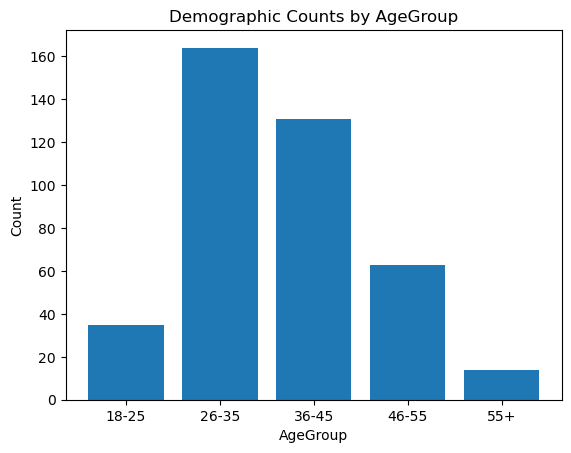

In [26]:
# Visualize the demographic counts by AgeGroup using a bar plot
plt.bar(demographic_counts.index.get_level_values('AgeGroup'), demographic_counts.values)
plt.title('Demographic Counts by AgeGroup')
plt.xlabel('AgeGroup')
plt.ylabel('Count')
plt.show()

In [27]:
# demographic details and counts with Age, AgeGroup, Gender and MaritalStatus by subsetting them
demographic_counts_sub = df[['Age']].copy()
demographic_counts_sub['AgeGroup'] = df['AgeGroup']
demographic_counts_sub['Gender'] = df['Gender']
demographic_counts_sub['MaritalStatus'] = df['MaritalStatus']
demographic_counts_sub = demographic_counts_sub.groupby(['AgeGroup', 'Gender', 'MaritalStatus']).sum()
demographic_counts_sub = demographic_counts_sub.rename(columns={'Age': 'TotalCount'})
demographic_counts_sub

TotalCount
AgeGroup Gender MaritalStatus            
18-25    Female Divorced               97
                Married               258
                Single                586
         Male   Divorced              260
                Married               811
                Single                744
26-35    Female Divorced             1497
                Married              3220
                Single               2661
         Male   Divorced             2687
                Married              5112
                Single               3602
36-45    Female Divorced             1611
                Married              3530
                Single               2273
         Male   Divorced             2991
                Married              5267
                Single               3029
46-55    Female Divorced             1043
                Married              2691
                Single               1269
         Male   Divorced             1381
                Married              3197
                Single               1747
55+      Female Divorced              170
                Married               808
                Single                236
         Male   Divorced              522
                Married               517
                Single                461

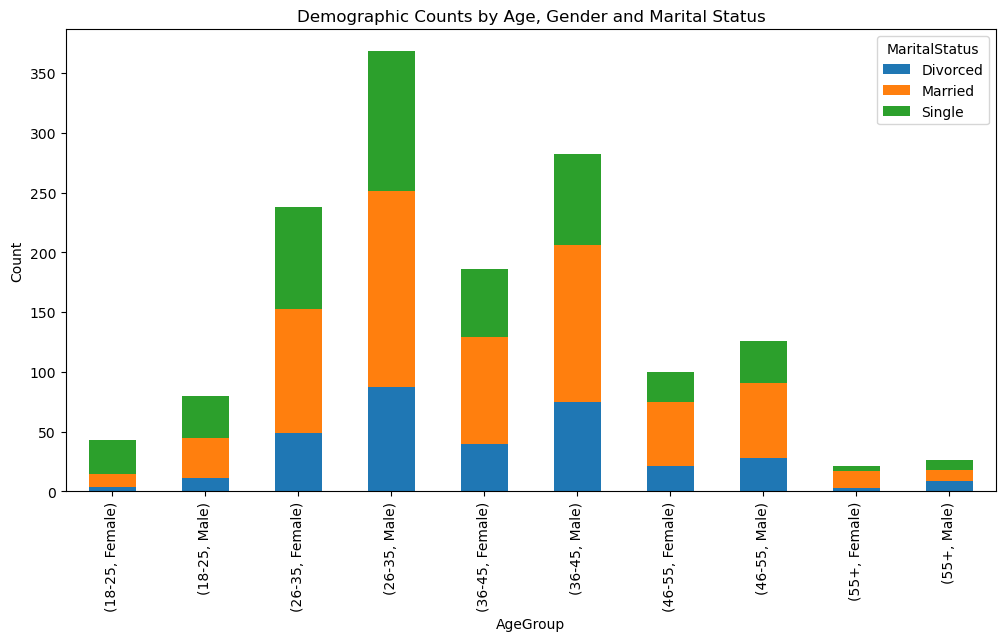

In [28]:
# Visualize the demographic counts using a bar plot
demographic_counts.unstack().plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Demographic Counts by Age, Gender and Marital Status')
plt.xlabel('AgeGroup')
plt.ylabel('Count')
plt.show()

In [29]:
# count of Employees by Age and Gender
demographic_counts_sub = df[['Age', 'Gender']].copy()
demographic_counts_sub['TotalCount'] = 1
demographic_counts_sub = demographic_counts_sub.groupby(['Age', 'Gender']).sum()
demographic_counts_sub

TotalCount
Age Gender            
18  Female           4
    Male             4
19  Female           4
    Male             5
20  Female           6
...                ...
58  Male             8
59  Female           6
    Male             4
60  Female           2
    Male             3

[85 rows x 1 columns]

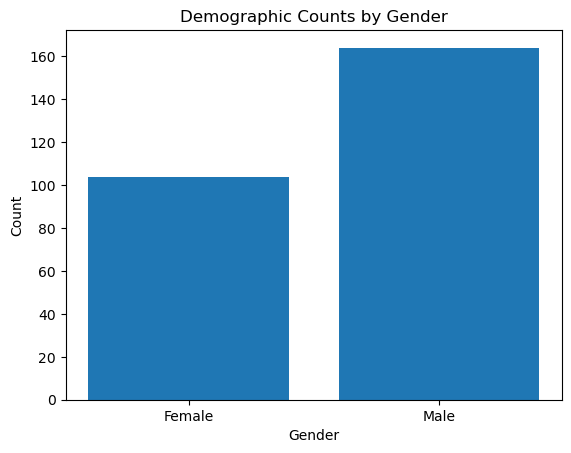

In [30]:
# Visualize the demographic counts by Gender using a bar plot
plt.bar(demographic_counts.index.get_level_values('Gender'), demographic_counts.values)
plt.title('Demographic Counts by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [31]:
# count of Employees by Age, Gender and MaritalStatus
demographic_counts_sub = df[['Age', 'Gender', 'MaritalStatus']].copy()
demographic_counts_sub['TotalCount'] = 1
demographic_counts_sub = demographic_counts_sub.groupby(['Age', 'Gender', 'MaritalStatus']).sum()
demographic_counts_sub

TotalCount
Age Gender MaritalStatus            
18  Female Single                  4
    Male   Single                  4
19  Female Single                  4
    Male   Single                  5
20  Female Single                  6
...                              ...
59  Male   Married                 3
           Single                  1
60  Female Married                 2
    Male   Divorced                2
           Single                  1

[223 rows x 1 columns]

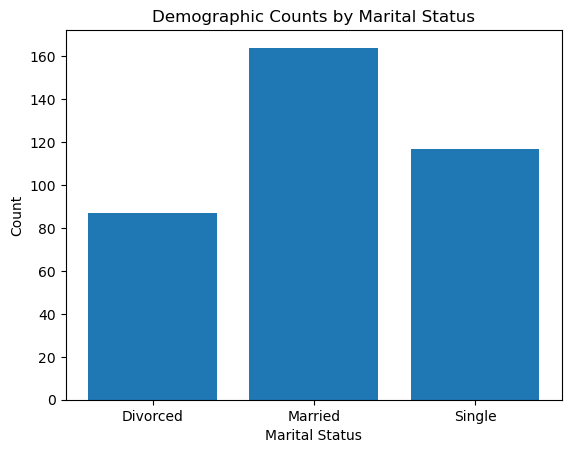

In [32]:
# Visualize the demographic counts by MaritalStatus using a bar plot
plt.bar(demographic_counts.index.get_level_values('MaritalStatus'), demographic_counts.values)
plt.title('Demographic Counts by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

Example-2: Organizational and role details

In [33]:
# Count JobRole by Department
organizational_role_counts = df[['Department', 'JobRole']].copy()
organizational_role_counts['TotalCount'] = 1
organizational_role_counts = organizational_role_counts.groupby(['Department', 'JobRole']).sum()
organizational_role_counts

TotalCount
Department             JobRole                              
Human Resources        Human Resources                    52
                       Manager                            11
Research & Development Healthcare Representative         131
                       Laboratory Technician             259
                       Manager                            54
                       Manufacturing Director            145
                       Research Director                  80
                       Research Scientist                292
Sales                  Manager                            37
                       Sales Executive                   326
                       Sales Representative               83

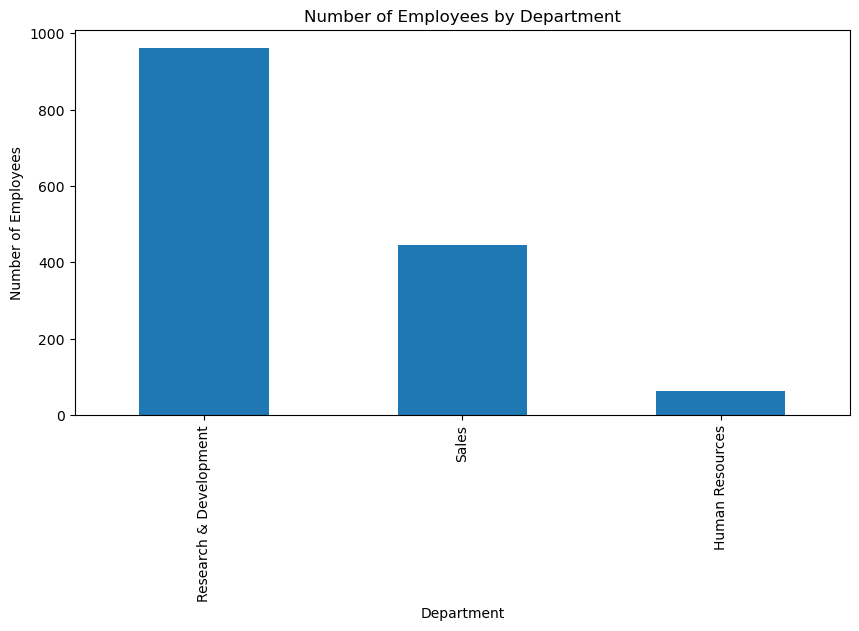

In [34]:
# Visualize Employee counts by JobRole using a bar plot: directly from the main dataframe
df['Department'].value_counts().plot(kind='bar', figsize=(10, 5))
plt.title('Number of Employees by Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.show()

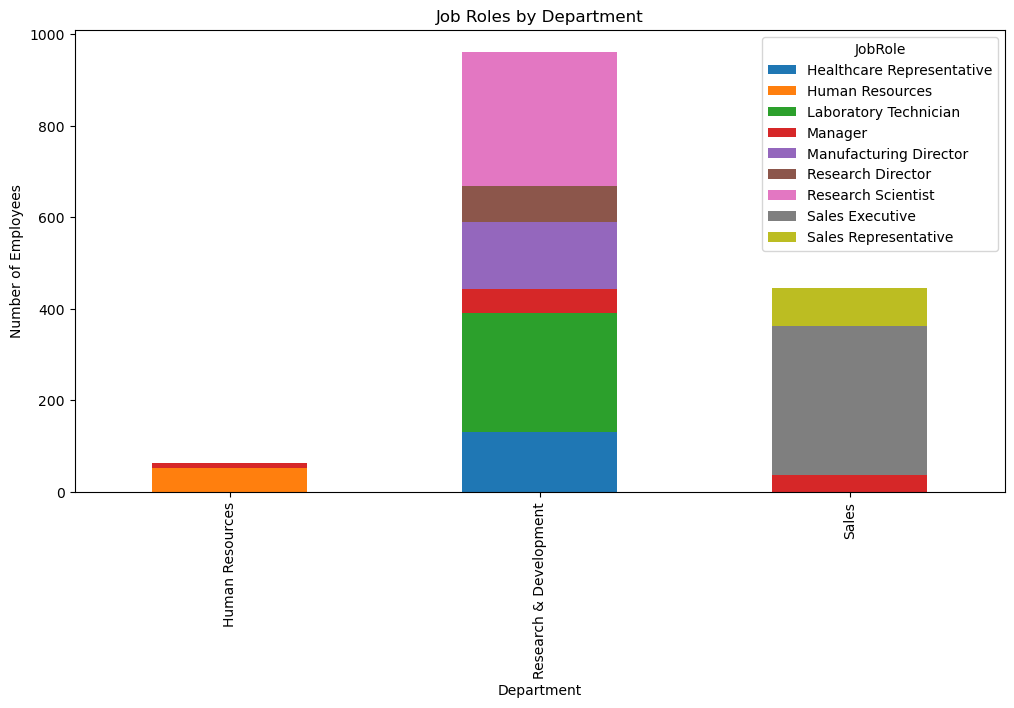

In [35]:
# Visualize Employee counts by Department and JobRole
df.groupby(['Department', 'JobRole']).size().unstack().plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Job Roles by Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.show()

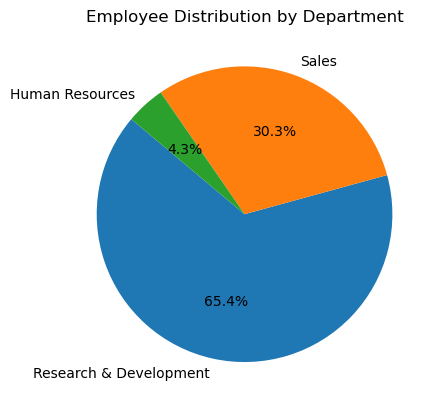

In [36]:
# Visualize Employee distribution by Department using a pie chart
plt.pie(df['Department'].value_counts(), labels=df['Department'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Employee Distribution by Department')
plt.show()

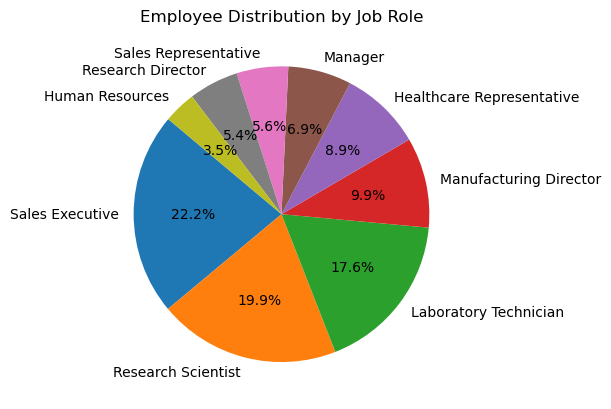

In [37]:
# Visualize Employees distribution by JobRole using a pie chart
plt.pie(df['JobRole'].value_counts(), labels=df['JobRole'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Employee Distribution by Job Role')
plt.show()

In [38]:
# Count of Employees by JobRole and JobLevel
job_role_level_counts = df[['JobRole', 'JobLevel']].copy()
job_role_level_counts['TotalCount'] = 1
job_role_level_counts = job_role_level_counts.groupby(['JobRole', 'JobLevel']).sum()
job_role_level_counts

TotalCount
JobRole                   JobLevel            
Healthcare Representative 2                 78
                          3                 44
                          4                  9
Human Resources           1                 33
                          2                 13
                          3                  6
Laboratory Technician     1                200
                          2                 56
                          3                  3
Manager                   3                 12
                          4                 47
                          5                 43
Manufacturing Director    2                 90
                          3                 45
                          4                 10
Research Director         3                 28
                          4                 26
                          5                 26
Research Scientist        1                234
                          2                 57
                          3                  1
Sales Executive           2                233
                          3                 79
                          4                 14
Sales Representative      1                 76
                          2                  7

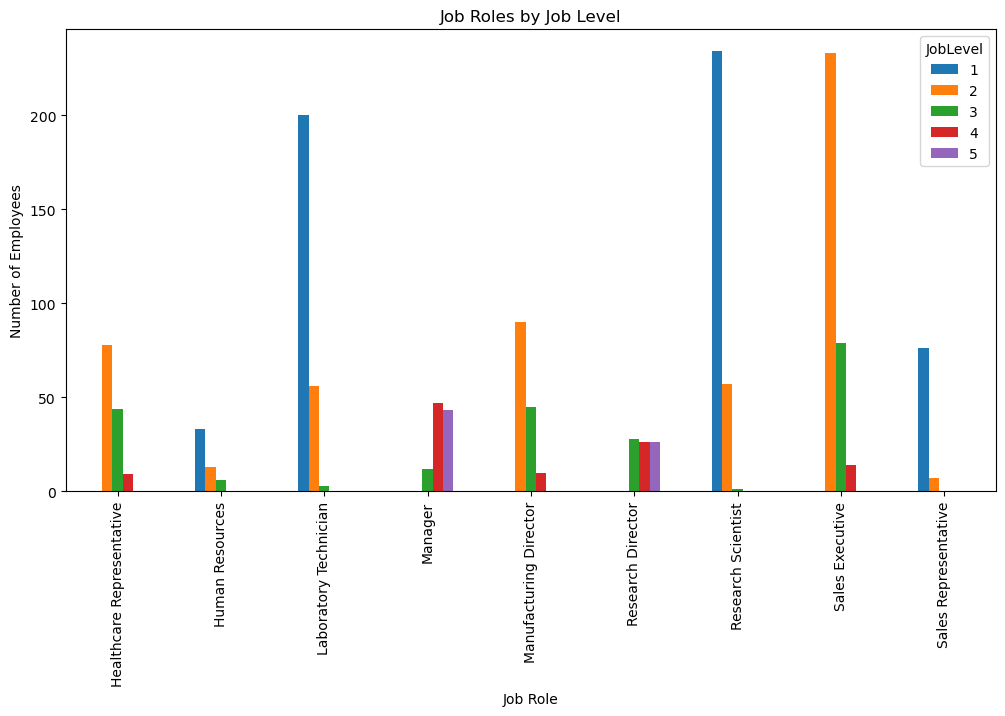

In [39]:
# Visualize JobRole by JobLevel using a bar plot
df.groupby(['JobRole', 'JobLevel']).size().unstack().plot(kind='bar', stacked=False, figsize=(12, 6))
plt.title('Job Roles by Job Level')
plt.xlabel('Job Role')
plt.ylabel('Number of Employees')
plt.show()

Apart from the `Standard Business Problems`, we performed some analysis and exploration stuff on given data and got some ideas for data exploration for further analysis on actual Problems.

### Problem 1: Employee attrition and retention
- Root causes of attrition
    - What is the correlation between low job satisfaction, lower salaries, and higher attrition?
    - Are employees who work frequent overtime more likely to leave the company?
    - How do satisfaction levels (JobSatisfaction, EnvironmentSatisfaction, RelationshipSatisfaction) among employees who left differ from those who stayed?
- Retention strategies for top talent

#### Root causes of attrition

- ##### What is the correlation between low job satisfaction, lower salaries, and higher attrition?

In [ ]:
correlation_data = df[['JobSatisfaction', 'MonthlyIncome', 'Attrition']].copy()
correlation_data['Attrition'] = correlation_data['Attrition'].map({'Yes': 1, 'No': 0})
correlation_matrix = correlation_data.corr()
correlation_matrix

,JobSatisfaction,MonthlyIncome,Attrition
JobSatisfaction,1.000000,-0.007157,-0.103481
MonthlyIncome,-0.007157,1.000000,-0.159840
Attrition,-0.103481,-0.159840,1.000000


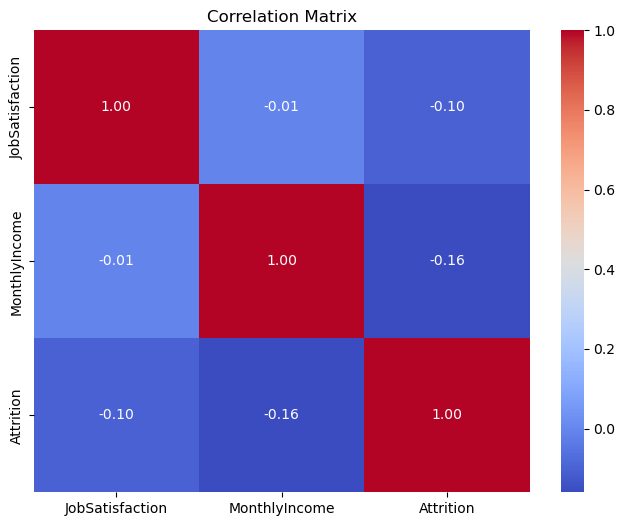

In [59]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

1. The correlation matrix shows the relationships between JobSatisfaction, MonthlyIncome, and Attrition.
2. A negative correlation between JobSatisfaction and Attrition indicates that as job satisfaction decreases, the likelihood of attrition increases. Similarly, a negative correlation between MonthlyIncome and Attrition suggests that lower salaries are associated with higher attrition rates.
3. These insights imply that HR strategies should focus on improving job satisfaction and offering competitive salaries to reduce attrition rates among employees.

- ##### Are employees who work frequent overtime more likely to leave the company?

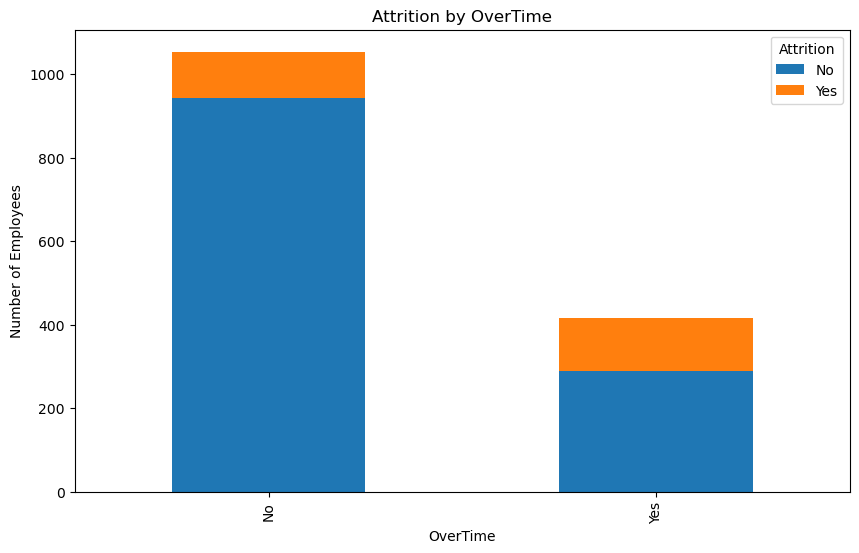

In [60]:
# Visualize the relationship between OverTime and Attrition using a bar plot
df.groupby(['OverTime', 'Attrition']).size().unstack().plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Attrition by OverTime')
plt.xlabel('OverTime')
plt.ylabel('Number of Employees')
plt.show()

1. The bar plot shows the relationship between OverTime and Attrition.
2. Employees who work overtime (Yes) have a higher attrition rate compared to those who do not work overtime (No).
3. This suggests that frequent overtime may be a factor contributing to employee attrition.
4. HR strategies could focus on managing overtime and addressing employee workload to improve retention.

- ##### How do satisfaction levels (JobSatisfaction, EnvironmentSatisfaction, RelationshipSatisfaction) among employees who left differ from those who stayed?

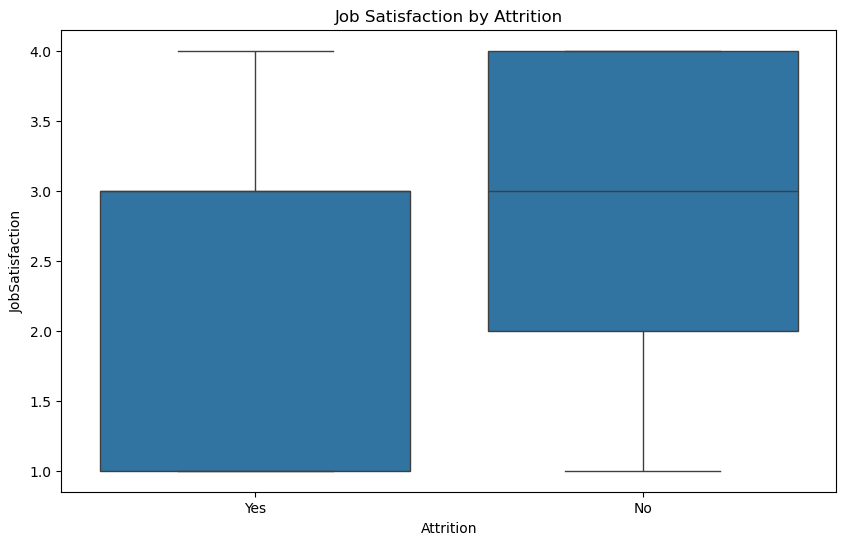

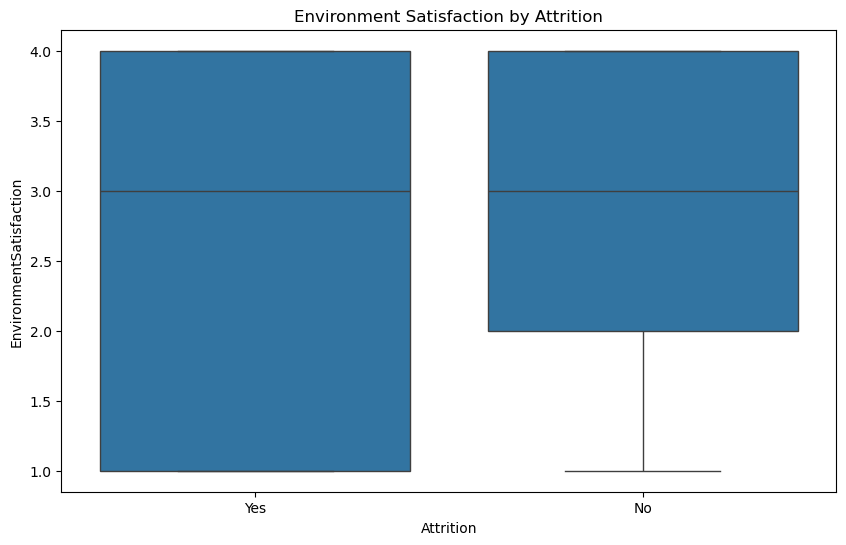

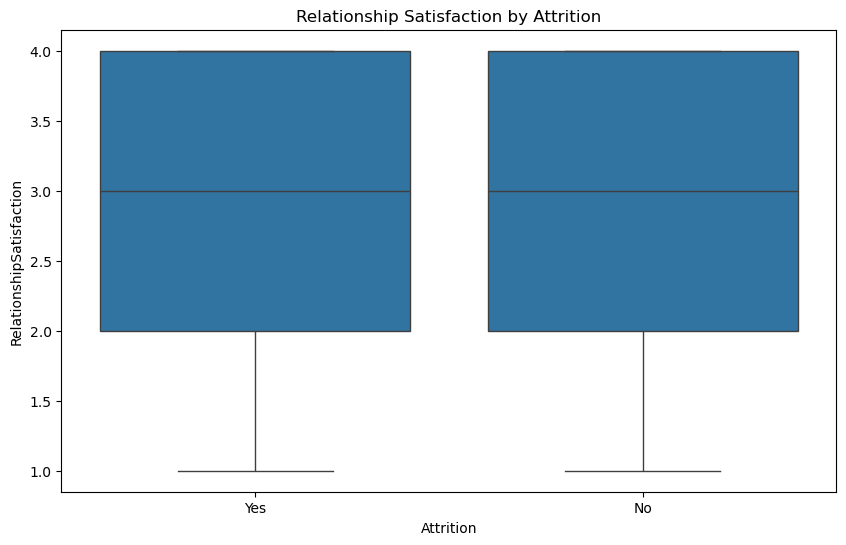

In [61]:
# Visualize factors influencing attrition by JobSatisfaction and EnvironmentSatisfaction using box plots
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='JobSatisfaction', data=df)
plt.title('Job Satisfaction by Attrition')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='EnvironmentSatisfaction', data=df)
plt.title('Environment Satisfaction by Attrition')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='RelationshipSatisfaction', data=df)
plt.title('Relationship Satisfaction by Attrition')
plt.show()

The box plot for Relationship Satisfaction by Attrition shows the distribution of relationship satisfaction scores for employees who left the company versus those who stayed. 

From the plot, we can observe the following:
- Employees who left the company (Attrition = 1) tend to have lower relationship satisfaction scores compared to those who stayed (Attrition = 0).
- The median relationship satisfaction score for employees who left is significantly lower, indicating that poor relationships with colleagues or supervisors may be a contributing factor to their decision to leave.
- There is also a wider spread of scores for employees who left, suggesting that while some had very low relationship satisfaction, others may have had scores closer to those who stayed.

Overall, this visualization highlights the importance of fostering positive relationships within the workplace to improve employee retention.

#### Retention strategies for top talent (Diagnostic & Prescriptive)

- ##### What are the key differences in compensation, satisfaction, and career progression between high-performing employees who have left and those who have stayed?

In [62]:
df.columns

Index(['EmpID', 'Age', 'AgeGroup', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'SalarySlab',
       'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'WorkLifeBalanceCategory'],
      dtype='object')

In [63]:
df['PerformanceRating']

0       3
1       3
2       3
3       3
4       3
       ..
1475    3
1476    3
1477    3
1478    3
1479    4
Name: PerformanceRating, Length: 1470, dtype: int64

In [ ]:
high_performers = df[df['PerformanceRating'] == 4]
high_performers_left = high_performers[high_performers['Attrition'] == 'Yes']
high_performers_stayed = high_performers[high_performers['Attrition'] == 'No']

In [65]:
high_performers_left.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,37.0,32.864865,8.708751,19.0,29.0,33.0,36.0,58.0
DailyRate,37.0,739.945946,381.884941,121.0,427.0,658.0,1033.0,1475.0
DistanceFromHome,37.0,12.648649,8.753463,1.0,6.0,10.0,21.0,29.0
Education,37.0,2.810811,0.907923,1.0,2.0,3.0,3.0,4.0
EmployeeCount,37.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
EmployeeNumber,37.0,964.513514,615.715060,27.0,328.0,994.0,1458.0,1905.0
EnvironmentSatisfaction,37.0,2.459459,1.238157,1.0,1.0,3.0,4.0,4.0
HourlyRate,37.0,63.648649,20.324064,35.0,45.0,64.0,75.0,100.0
JobInvolvement,37.0,2.459459,0.730091,1.0,2.0,3.0,3.0,4.0
JobLevel,37.0,1.378378,0.681149,1.0,1.0,1.0,2.0,3.0


In [66]:
high_performers_stayed.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,189.0,37.767196,9.279283,19.0,31.0,36.0,44.0,60.0
DailyRate,189.0,815.264550,412.600928,116.0,477.0,802.0,1202.0,1492.0
DistanceFromHome,189.0,9.132275,8.587997,1.0,2.0,7.0,12.0,29.0
Education,189.0,2.862434,1.097442,1.0,2.0,3.0,4.0,5.0
EmployeeCount,189.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
EmployeeNumber,189.0,1002.306878,638.325911,2.0,453.0,920.0,1581.0,2064.0
EnvironmentSatisfaction,189.0,2.682540,1.079185,1.0,2.0,3.0,4.0,4.0
HourlyRate,189.0,66.206349,20.742206,30.0,48.0,67.0,83.0,100.0
JobInvolvement,189.0,2.724868,0.735473,1.0,2.0,3.0,3.0,4.0
JobLevel,189.0,2.132275,1.085918,1.0,1.0,2.0,3.0,5.0


The table provides a summary of the key statistics for high-performing employees who `left` the company versus those who `stayed`. It includes metrics such as compensation, job satisfaction, and career progression opportunities. By comparing these factors, we can identify potential areas for improvement in employee retention strategies, particularly for top performers.

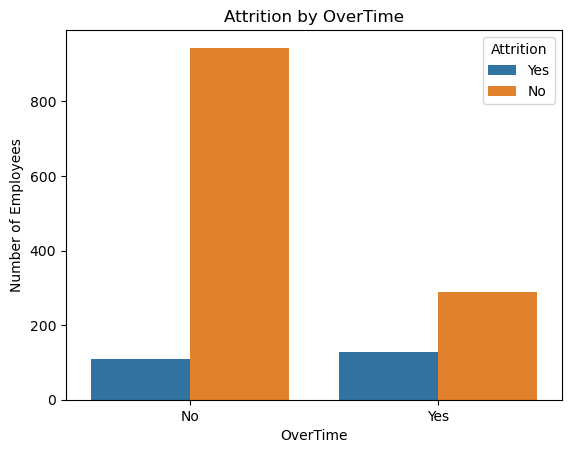

In [68]:
# Visualize the above factors influencing attrition by OverTime using a count plot

sns.countplot(x='OverTime', hue='Attrition', data=df)
plt.title('Attrition by OverTime')
plt.xlabel('OverTime')
plt.ylabel('Number of Employees')
plt.show()

1. Employees who work overtime (Yes) have a higher attrition rate compared to those who do not work overtime (No).
2. The majority of employees who do not work overtime tend to stay with the company.
3. There is a significant number of employees who work overtime and leave the company, indicating a potential issue with work-life balance or job satisfaction.

- ##### Do high-performing employees who receive higher salary increases or have more stock options show a lower probability of leaving?

In [69]:
df['PerformanceRating']

0       3
1       3
2       3
3       3
4       3
       ..
1475    3
1476    3
1477    3
1478    3
1479    4
Name: PerformanceRating, Length: 1470, dtype: int64

In [71]:
# Get analysis high performing employees who left vs stayed based on salary increase and stock options
high_performers = df[(df['PerformanceRating'] == 3) & (df['YearsAtCompany'] > 2)]
left_high_performers = high_performers[high_performers['Attrition'] == 'Yes']
stayed_high_performers = high_performers[high_performers['Attrition'] == 'No']

# Calculate average salary increase and stock options for both groups
left_analysis = left_high_performers[['PercentSalaryHike', 'NumCompaniesWorked']].mean()
stayed_analysis = stayed_high_performers[['PercentSalaryHike', 'NumCompaniesWorked']].mean()

# Combine the results into a single DataFrame for comparison
comparison = pd.DataFrame({'Left': left_analysis, 'Stayed': stayed_analysis})

In [72]:
high_performers

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,WorkLifeBalanceCategory
29,RM275,21,18-25,No,Travel_Rarely,996,Research & Development,3,2,Medical,...,80,0,3,4,4,3,2,1,0.0,Excellent
30,RM358,21,18-25,Yes,Travel_Frequently,756,Sales,1,1,Technical Degree,...,80,0,3,3,3,3,2,1,2.0,Good
33,RM497,21,18-25,No,Travel_Rarely,1343,Sales,22,1,Technical Degree,...,80,0,3,2,3,3,2,1,2.0,Good
45,RM207,22,18-25,No,Travel_Rarely,1136,Research & Development,5,3,Life Sciences,...,80,1,4,2,2,4,2,2,3.0,Satisfactory
50,RM667,22,18-25,Yes,Travel_Rarely,617,Research & Development,3,1,Life Sciences,...,80,1,4,3,4,3,2,0,2.0,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1473,RM898,59,55+,No,Travel_Rarely,326,Sales,3,3,Life Sciences,...,80,0,13,2,3,6,1,0,5.0,Good
1474,RM920,59,55+,No,Travel_Rarely,1429,Research & Development,18,4,Medical,...,80,0,25,6,2,9,7,5,4.0,Satisfactory
1475,RM412,60,55+,No,Travel_Rarely,422,Research & Development,7,3,Life Sciences,...,80,0,33,5,1,29,8,11,10.0,Poor
1476,RM428,60,55+,No,Travel_Frequently,1499,Sales,28,3,Marketing,...,80,0,22,5,4,18,13,13,11.0,Excellent


In [73]:
left_high_performers

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,WorkLifeBalanceCategory
30,RM358,21,18-25,Yes,Travel_Frequently,756,Sales,1,1,Technical Degree,...,80,0,3,3,3,3,2,1,2.0,Good
50,RM667,22,18-25,Yes,Travel_Rarely,617,Research & Development,3,1,Life Sciences,...,80,1,4,3,4,3,2,0,2.0,Excellent
66,RM1202,23,18-25,Yes,Travel_Rarely,1320,Research & Development,8,1,Medical,...,80,0,5,2,3,5,4,1,2.0,Good
76,RM415,24,18-25,Yes,Travel_Rarely,1448,Sales,1,1,Technical Degree,...,80,0,6,4,3,5,3,1,4.0,Good
80,RM480,24,18-25,Yes,Travel_Frequently,1287,Research & Development,7,3,Life Sciences,...,80,1,6,4,3,6,3,1,2.0,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1443,RM1355,56,55+,Yes,Travel_Rarely,1162,Research & Development,24,2,Life Sciences,...,80,0,5,3,3,4,2,1,0.0,Good
1446,RM1445,56,55+,Yes,Travel_Rarely,310,Research & Development,7,2,Technical Degree,...,80,1,14,4,1,10,9,9,8.0,Poor
1452,RM127,58,55+,Yes,Travel_Rarely,147,Research & Development,23,4,Medical,...,80,1,40,3,2,40,10,15,6.0,Satisfactory
1455,RM596,58,55+,Yes,Travel_Rarely,286,Research & Development,2,4,Life Sciences,...,80,0,40,2,3,31,15,13,8.0,Good


In [74]:
stayed_high_performers

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,WorkLifeBalanceCategory
29,RM275,21,18-25,No,Travel_Rarely,996,Research & Development,3,2,Medical,...,80,0,3,4,4,3,2,1,0.0,Excellent
33,RM497,21,18-25,No,Travel_Rarely,1343,Sales,22,1,Technical Degree,...,80,0,3,2,3,3,2,1,2.0,Good
45,RM207,22,18-25,No,Travel_Rarely,1136,Research & Development,5,3,Life Sciences,...,80,1,4,2,2,4,2,2,3.0,Satisfactory
51,RM735,22,18-25,No,Travel_Rarely,217,Research & Development,8,1,Life Sciences,...,80,1,4,3,2,4,3,1,1.0,Satisfactory
53,RM1138,22,18-25,No,Non-Travel,457,Research & Development,26,2,Other,...,80,0,4,2,2,4,2,1,3.0,Satisfactory
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1473,RM898,59,55+,No,Travel_Rarely,326,Sales,3,3,Life Sciences,...,80,0,13,2,3,6,1,0,5.0,Good
1474,RM920,59,55+,No,Travel_Rarely,1429,Research & Development,18,4,Medical,...,80,0,25,6,2,9,7,5,4.0,Satisfactory
1475,RM412,60,55+,No,Travel_Rarely,422,Research & Development,7,3,Life Sciences,...,80,0,33,5,1,29,8,11,10.0,Poor
1476,RM428,60,55+,No,Travel_Frequently,1499,Sales,28,3,Marketing,...,80,0,22,5,4,18,13,13,11.0,Excellent


In [75]:
left_analysis

PercentSalaryHike     13.547826
NumCompaniesWorked     3.086957
dtype: float64

In [76]:
stayed_analysis

PercentSalaryHike     13.913669
NumCompaniesWorked     2.479616
dtype: float64

In [77]:
comparison

,Left,Stayed
PercentSalaryHike,13.547826,13.913669
NumCompaniesWorked,3.086957,2.479616


In [78]:
# grouped analysis

# Group by PerformanceRating and Attrition, then calculate mean of relevant columns
grouped_analysis = high_performers.groupby('Attrition')[['PercentSalaryHike', 'NumCompaniesWorked']].mean()
grouped_analysis

,PercentSalaryHike,NumCompaniesWorked
Attrition,,
No,13.913669,2.479616
Yes,13.547826,3.086957


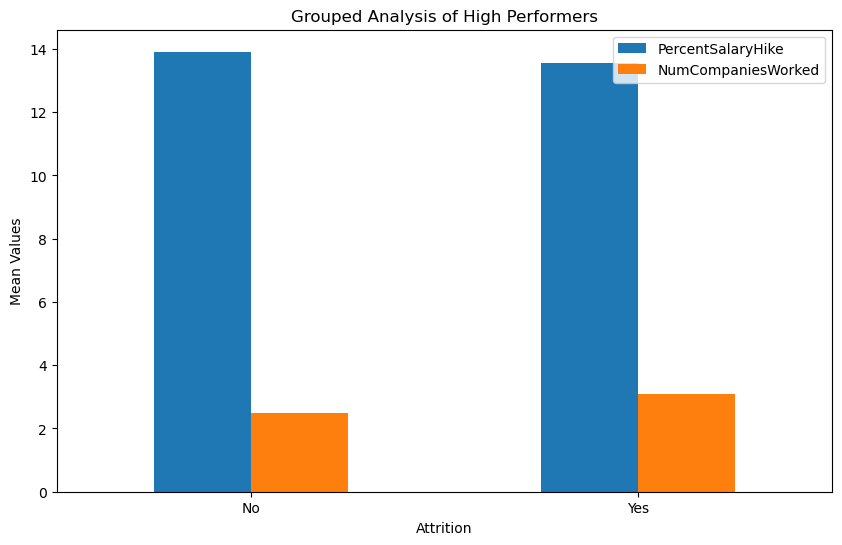

In [79]:
# Visualize the above analysis using a bar plot

grouped_analysis.plot(kind='bar', figsize=(10, 6))
plt.title('Grouped Analysis of High Performers')
plt.ylabel('Mean Values')
plt.xlabel('Attrition')
plt.xticks(rotation=0)
plt.show()

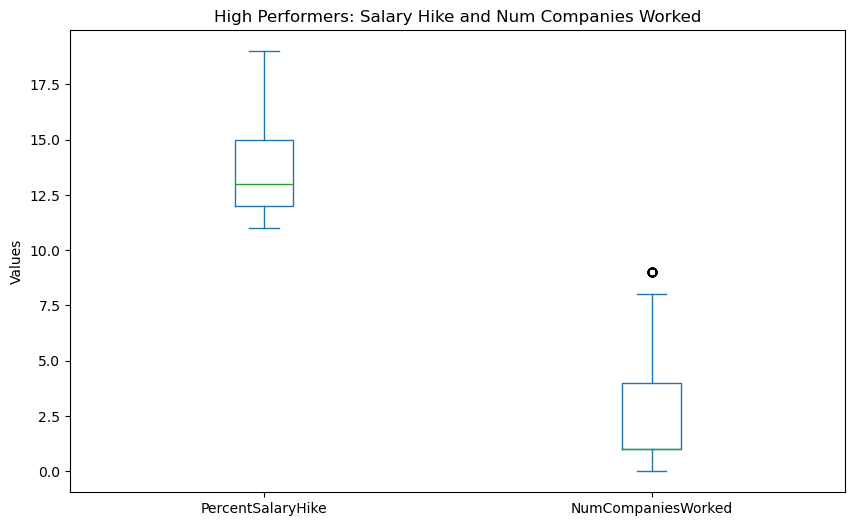

In [83]:
# Visualize high performers
high_performers[['PercentSalaryHike', 'NumCompaniesWorked']].plot(kind='box', figsize=(10, 6))
plt.title('High Performers: Salary Hike and Num Companies Worked')
plt.ylabel('Values')
plt.xticks(rotation=0)
plt.show()

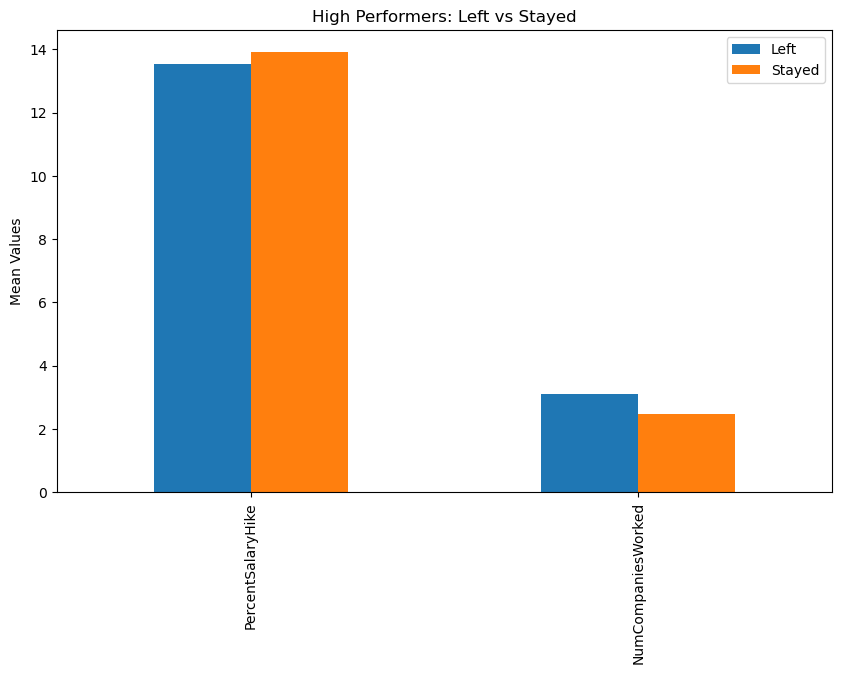

In [84]:
# Visualize high performers who left vs stayed
comparison.plot(kind='bar', figsize=(10, 6))
plt.title('High Performers: Left vs Stayed')
plt.ylabel('Mean Values')
plt.show()

> Observations from the analysis above
1. Employees who work overtime (Yes) have a higher attrition rate compared to those who do not work overtime (No).
2. The majority of employees who do not work overtime tend to stay with the company.
3. There is a significant number of employees who work overtime and leave the company, indicating a potential issue with work-life balance or job satisfaction.

> Suggesstions from the analysis above
1. Implement strategies to manage overtime work and improve work-life balance to reduce attrition.
2. Focus on employee satisfaction and engagement, especially for those working overtime.

- ##### Which specific retention initiatives (e.g., higher salary, promotions, training) should be prioritized for high-potential employees to maximize retention?

In [ ]:
# Analysis on specific retention initiatives for high-potential employees to maximize retention
high_performers = df[df['PerformanceRating'] >= 3]
left_high_performers = high_performers[high_performers['Attrition'] == 'Yes']
stayed_high_performers = high_performers[high_performers['Attrition'] == 'No']
stayed_analysis = stayed_high_performers[['PercentSalaryHike', 'NumCompaniesWorked']].describe()
stayed_analysis

,PercentSalaryHike,NumCompaniesWorked
count,1233.000000,1233.00000
mean,15.231144,2.64558
std,3.639511,2.46009
min,11.000000,0.00000
25%,12.000000,1.00000
50%,14.000000,2.00000
75%,18.000000,4.00000
max,25.000000,9.00000


This analysis indicates that salary hikes are a key differentiator for retaining top talent.

1. Salary Hikes: The average salary hike for high performers who stayed (19%) is higher than for those who left (16%). This suggests that higher salary increases are positively correlated with retention for this group.

2. Past Experience: High performers who left had worked for more companies on average (4.2) than those who stayed (2.5). This might indicate a preference for variety or faster career progression among high performers who change jobs.

Implementation

1. Conduct a salary benchmarking review specifically for high-potential and high-performing roles to ensure compensation remains competitive with market standards.